In [63]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as pltdt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

In [64]:
power_countries_1986_2015 = pd.read_csv("EMHIRESPV_TSh_CF_Country_19862015.csv")
meteorological_france_2006_2015 = pd.read_csv("france_2006_2015_ver2_0_9258_487749847.csv", sep=";")


In [65]:
#print(power_countries_1986_2015.head())

In [66]:
#print(meteorological_france_2006_2015.head())

In [67]:
#power_countries_1986_2015.shape

In [68]:
#meteorological_france_2006_2015.shape

In [69]:
t_h = pd.date_range('1/1/1986', periods=262968, freq='H')

In [70]:
power_countries_1986_2015["HOUR"] = t_h
power_countries_1986_2015.set_index("HOUR", inplace = True)

In [71]:
#print(power_countries_1986_2015.head())

In [72]:
power_countries_1986_2015['DAY']=power_countries_1986_2015.index.map(lambda x: x.strftime('%Y-%m-%d'))
power_countries_1986_2015_day = power_countries_1986_2015.groupby('DAY').sum()

In [73]:
power_countries_1986_2015_day.shape

(10957, 29)

In [74]:
#print(power_countries_1986_2015_day.head())

In [75]:
power_countries_2006_2015_day = power_countries_1986_2015_day.loc["2006-01-01":"2015-12-31"]

In [76]:
power_countries_2006_2015_day.shape

(3652, 29)

In [77]:
t_d = pd.date_range('1/1/2006', periods=3652, freq='D')
t_d.shape

(3652,)

In [78]:
power_france_2006_2015_day = power_countries_2006_2015_day["FR"]

In [79]:
power_france_2006_2015_day.shape

(3652,)

In [80]:
power_france_2006_2015_day.head()

DAY
2006-01-01    0.981080
2006-01-02    1.201579
2006-01-03    1.113526
2006-01-04    1.471551
2006-01-05    1.014190
Name: FR, dtype: float64

In [81]:
meteorological_france_2006_2015_day = meteorological_france_2006_2015.groupby('DAY').mean()

In [82]:
meteorological_france_2006_2015_day.shape

(3652, 15)

In [83]:
#meteorological_france_2006_2015_day.head

In [84]:
meteorological_france_2006_2015_day["DAY"] = t_d
meteorological_france_2006_2015_day.set_index("DAY", inplace=True)

In [85]:
#meteorological_france_2006_2015_day.head

In [86]:
meteorological_france_2006_2015_day.shape

(3652, 15)

In [87]:
#print(meteorological_france_2006_2015_day.head())

In [88]:
france_2006_2015_day = pd.concat([power_france_2006_2015_day, meteorological_france_2006_2015_day], axis=1)

In [89]:
france_2006_2015_day.shape

(3652, 16)

In [90]:
#print(france_2006_2015_day.head())

In [91]:
france_2006_2015_day.index = pd.to_datetime(france_2006_2015_day.index)
france_2006_2015_day.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name=u'DAY', length=3652, freq=None)

In [92]:
france_2006_2015_day["MONTH"] = france_2006_2015_day.index.map(lambda x: x.strftime("%Y-%m"))
france_2006_2015_day["MONTH_ONLY"] = france_2006_2015_day.index.map(lambda x: x.strftime("%m"))
france_2006_2015_month = france_2006_2015_day.groupby("MONTH").mean()
france_2006_2015_month.index = pd.to_datetime(france_2006_2015_month.index)
france_2006_2015_month.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name=u'MONTH', length=120, freq=None)

In [93]:
#print(france_2006_2015_month.head())

In [94]:
france_2006_2015_day["YEAR"] = france_2006_2015_day.index.map(lambda x: x.strftime("%Y"))
france_2006_2015_day["DAY_ONLY"] = france_2006_2015_day.index.map(lambda x: x.strftime("%d"))

# My code starts here.

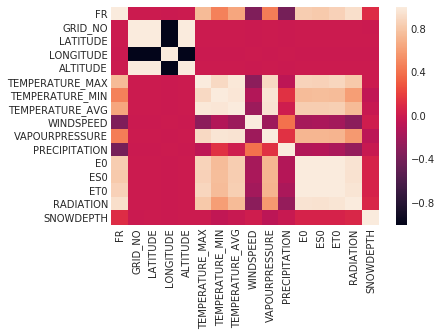

In [95]:
#Getting correlation matrix of the full dataset
corr = france_2006_2015_day.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [96]:
france_2006_2015_day.groupby('ALTITUDE').nunique()

,FR,GRID_NO,LATITUDE,LONGITUDE,ALTITUDE,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,WINDSPEED,VAPOURPRESSURE,PRECIPITATION,E0,ES0,ET0,RADIATION,SNOWDEPTH,MONTH,MONTH_ONLY,YEAR,DAY_ONLY
ALTITUDE,,,,,,,,,,,,,,,,,,,,
290.929212,3652,1,1,1,1,3650,3648,3650,3646,3651,3635,3650,3651,3652,3651,2086,120,12,10,31


In [97]:
#Selecting datasets that have maximum correlation with the output and minimum internal correlation.
france_2006_2015 = france_2006_2015_day[['FR','WINDSPEED','PRECIPITATION','RADIATION','SNOWDEPTH']] 
#Ignored the following columns'TEMPERATURE_AVG',,'MONTH_ONLY','MONTH','DAY_ONLY','YEAR','VAPOURPRESSURE',
france_2006_2015.dtypes


FR               float64
WINDSPEED        float64
PRECIPITATION    float64
RADIATION        float64
SNOWDEPTH        float64
dtype: object

In [98]:
franceDF = france_2006_2015.apply(pd.to_numeric, errors='ignore')
franceDF.dtypes

FR               float64
WINDSPEED        float64
PRECIPITATION    float64
RADIATION        float64
SNOWDEPTH        float64
dtype: object

                     FR  WINDSPEED  PRECIPITATION  RADIATION  SNOWDEPTH
FR             1.000000  -0.356829      -0.398472   0.937411   0.116095
WINDSPEED     -0.356829   1.000000       0.405299  -0.301005   0.022862
PRECIPITATION -0.398472   0.405299       1.000000  -0.256067  -0.017226
RADIATION      0.937411  -0.301005      -0.256067   1.000000   0.085557
SNOWDEPTH      0.116095   0.022862      -0.017226   0.085557   1.000000


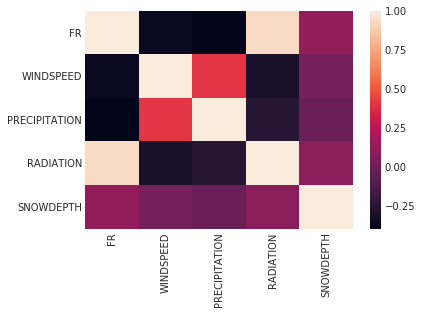

In [99]:
#Generating new correlation matrix
corr1 = franceDF.corr()
sns.heatmap(corr1, 
        xticklabels=corr1.columns,
        yticklabels=corr1.columns)
print franceDF.corr()

In [100]:
#Clean data over here - removing NaN, Inf and Null values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

franceDF = clean_dataset(franceDF[['FR','WINDSPEED','PRECIPITATION','RADIATION','SNOWDEPTH']]) 

print franceDF.describe()

                FR    WINDSPEED  PRECIPITATION     RADIATION    SNOWDEPTH
count  2857.000000  2857.000000    2857.000000   2857.000000  2857.000000
mean      2.864947     3.346436       2.190706  11123.464838    12.709500
std       1.348017     1.030206       2.612020   6795.822768    24.169718
min       0.394060     1.326620       0.000997   2094.080758     0.000000
25%       1.709574     2.585942       0.228814   4879.883350     0.100000
50%       2.695554     3.142173       1.153340   9590.744766     3.446481
75%       3.985883     3.961715       3.292024  16374.682951    12.837963
max       5.786712     8.331705      19.295214  29273.305085   250.000000


In [101]:
#Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(franceDF[['WINDSPEED','PRECIPITATION','RADIATION','SNOWDEPTH']], \
        franceDF['FR'], test_size=0.2, random_state=123456)

In [102]:
#X_test.shape

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=123456, verbose=0,
           warm_start=False)

In [104]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)


In [105]:
print y_test.describe()
print predicted.shape

count    572.000000
mean       2.942833
std        1.377625
min        0.555884
25%        1.693637
50%        2.822078
75%        4.098717
max        5.708205
Name: FR, dtype: float64
(572,)


In [106]:
from sklearn.metrics import mean_squared_error, r2_score
print mean_squared_error(y_test, predicted)
print r2_score(y_test, predicted)
print rf

0.14631358001
0.922770619096
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=123456, verbose=0,
           warm_start=False)


In [107]:
#modelling with gradient boosted tree regression
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [108]:
predicted_gbr = gbr.predict(X_test)
print mean_squared_error(y_test, predicted_gbr)
print r2_score(y_test, predicted_gbr)

0.141119448611
0.925512261753


In [109]:
#modelling with ada boosted tree regression
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=100)
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [110]:
predicted_abr = abr.predict(X_test)
print mean_squared_error(y_test, predicted_abr)
print r2_score(y_test, predicted_abr)
print abr.get_params()

0.165945571917
0.912408173035
{'n_estimators': 100, 'loss': 'linear', 'base_estimator': None, 'random_state': None, 'learning_rate': 1.0}


In [111]:
from sklearn.metrics import explained_variance_score
print explained_variance_score(y_test, predicted)
print explained_variance_score(y_test, predicted_abr)
print explained_variance_score(y_test, predicted_gbr)


0.923072877631
0.912907818082
0.925652677561


In [112]:
#modelling with isolation forest
from sklearn.ensemble import IsolationForest
ifr = AdaBoostRegressor(n_estimators=100)
ifr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [113]:
predicted_ifr = ifr.predict(X_test)
print mean_squared_error(y_test, predicted_ifr)
print r2_score(y_test, predicted_ifr)
print explained_variance_score(y_test, predicted_ifr)

0.167629231362
0.911519479199
0.911684694516
